In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/araj2/customer-database/master/Ecommerce%20Customers.csv")

# **Take look into our dataset**

In [ ]:
dataset.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
scale = StandardScaler()
df = scale.fit_transform(dataset.iloc[:,3:])
dataset = pd.DataFrame(df,columns=dataset.columns[3:])
dataset

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,1.456351,0.607280,2.493589,0.550107,1.118654
1,-1.136502,-0.949464,0.206556,-0.870927,-1.351783
2,-0.052723,-0.727139,0.049681,0.572067,-0.148501
3,1.263010,1.676390,-0.335978,-0.413996,1.041684
4,0.279838,0.747770,0.471737,0.914422,1.263224
...,...,...,...,...,...
495,0.186035,1.524003,-0.636429,0.213479,0.940658
496,1.663357,-0.359187,0.128603,0.043139,0.375274
497,-0.409872,-0.556854,1.260187,1.427261,0.660135
498,0.271597,0.341248,-0.218291,-1.199042,-0.540724


In [ ]:
dataset.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,2.913225e-15,-1.083578e-15,6.274092e-15,-1.563194e-16,-1.207923e-16
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-3.550697e+00,-3.568527e+00,-3.117055e+00,-3.269191e+00,-3.062310e+00
25%,-7.174193e-01,-6.688689e-01,-7.045108e-01,-6.040522e-01,-6.849936e-01
50%,2.905905e-02,-6.972938e-02,8.837402e-03,5.143335e-04,-5.378437e-03
75%,6.643923e-01,7.061488e-01,6.498278e-01,5.940635e-01,6.310282e-01
max,3.112709e+00,3.095491e+00,2.917088e+00,3.395075e+00,3.359664e+00


# **checking for null values in the dataset**

In [ ]:
dataset.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

*As there is no null values we can continue with outliers detection*

# **Checking for outliers using boxplot**

In [ ]:
dataset.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

**A function for box plot**

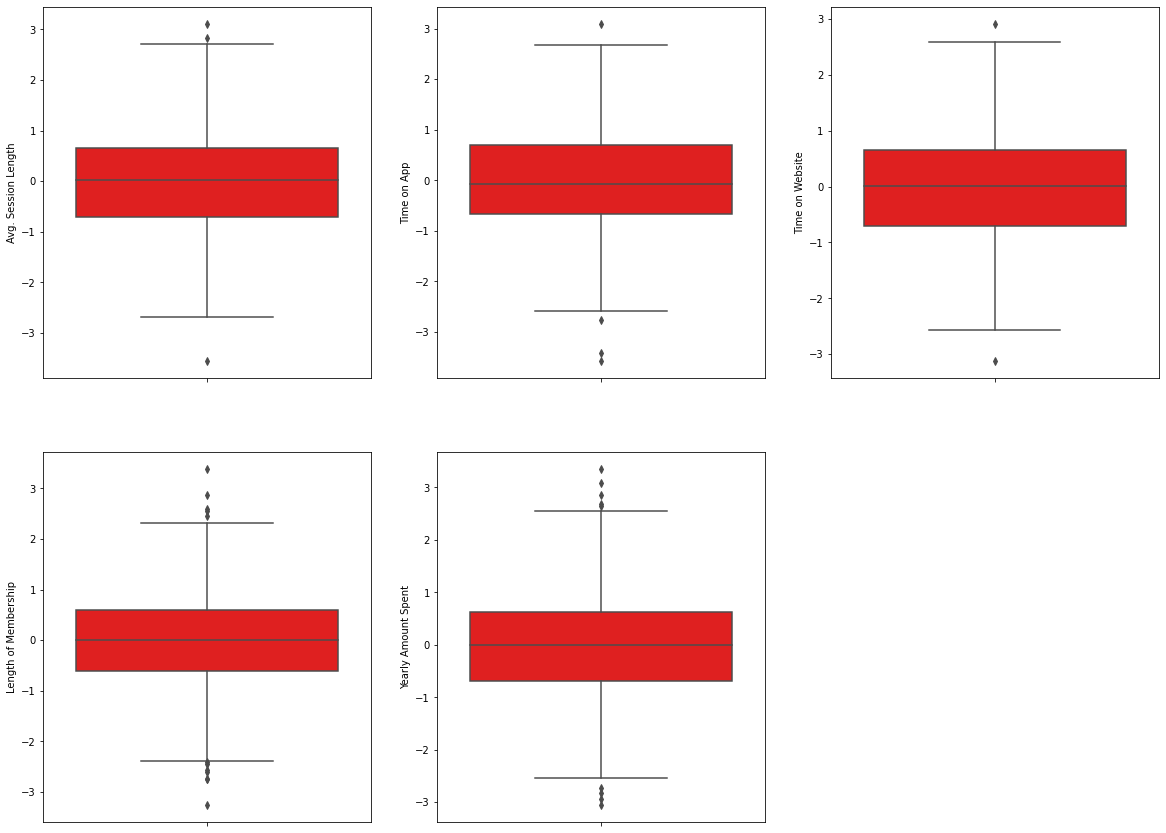

In [ ]:
fig, axes = plt.subplots(2, 3,figsize=(20, 15))
sns.boxplot(y=dataset["Avg. Session Length"],color="red", ax=axes[0,0])
sns.boxplot(y=dataset["Time on App"],color="red", ax=axes[0,1])
sns.boxplot(y=dataset["Time on Website"],color="red", ax=axes[0,2])
sns.boxplot(y=dataset["Length of Membership"],color="red", ax=axes[1,0])
sns.boxplot(y=dataset["Yearly Amount Spent"],color="red", ax=axes[1,1])
fig.delaxes(axes.flatten()[5])

There are too many outliers so we have to remove then 

**A function for outliers**

In [ ]:
def outliers_detector(data,features):
    outliers = []
    for i in features:
      Q1 = data[i].quantile(0.25)
      Q2 = data[i].quantile(0.5)
      Q3 = data[i].quantile(0.75)
      iqr = Q3 - Q1
      mini = Q1 - 1.5 * iqr
      maxi = Q3 + 1.5 * iqr
      print(f"mini,{mini},maxi,{maxi},Q1,{Q1},medain,{Q2},Q3,{Q3},irq,{iqr},{i}")
      outliers.extend(list(data[i].index[(data[i] > maxi) | (data[i] < mini)]))
    return outliers

ind = outliers_detector(dataset.iloc[:,3:],list(dataset.columns)[3:])
print(ind,len(dataset))


mini,-2.4012257696241637,maxi,2.391237108897772,Q1,-0.6040521901784377,medain,0.0005143334964942134,Q3,0.5940635294520462,irq,1.198115719630484,Length of Membership
mini,-2.6590263321153738,maxi,2.605060927388111,Q1,-0.684993609801567,medain,-0.005378437464511693,Q3,0.6310282050743041,irq,1.316021814875871,Yearly Amount Spent
[50, 151, 153, 157, 161, 173, 225, 303, 379, 396, 434, 447, 50, 65, 157, 205, 225, 299, 303, 368, 415] 500


**function to remove outliers**

In [ ]:
def outliers_remover(data,outliers):
  data.drop(set(outliers),inplace=True)
  return data
df = outliers_remover(dataset,ind)
print(len(df))

483


After removeing outliers

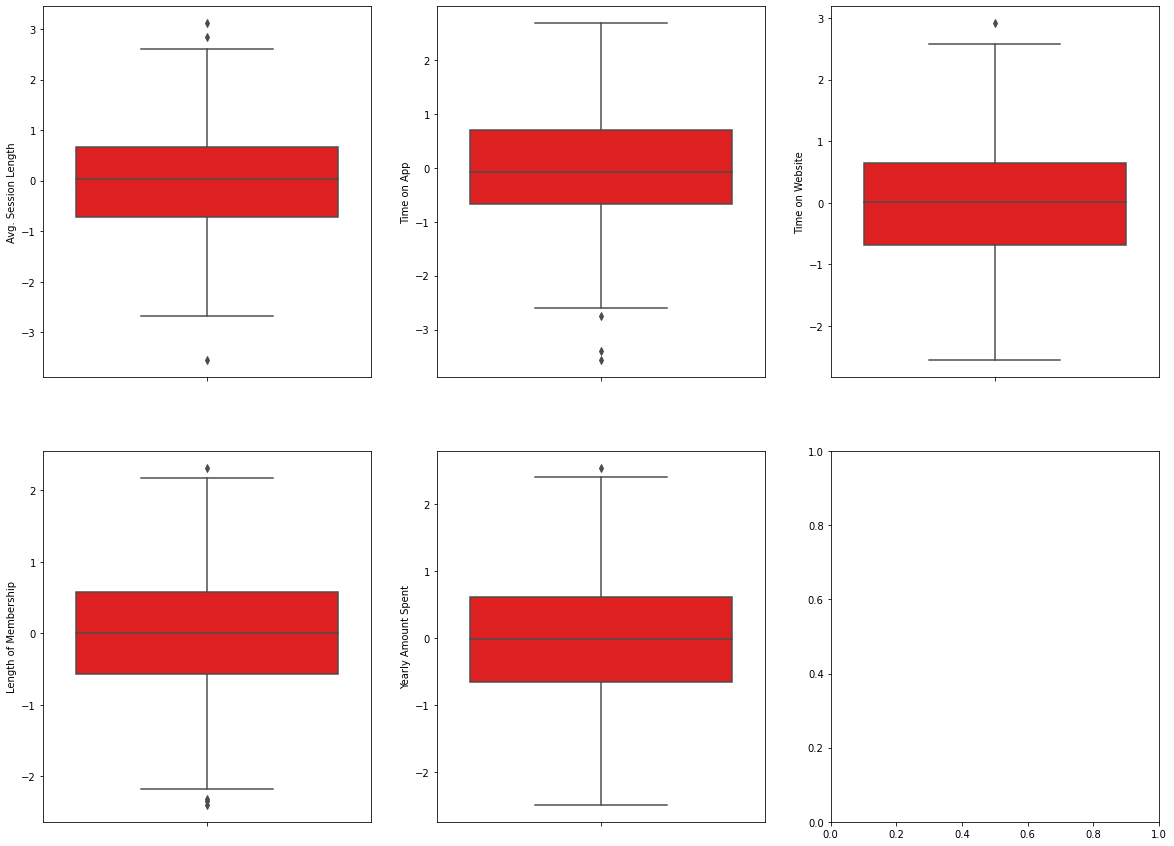

In [ ]:
fig, axes = plt.subplots(2, 3,figsize=(20, 15))
sns.boxplot(y=df["Avg. Session Length"],color="red", ax=axes[0,0])
sns.boxplot(y=df["Time on App"],color="red", ax=axes[0,1])
sns.boxplot(y=df["Time on Website"],color="red", ax=axes[0,2])
sns.boxplot(y=df["Length of Membership"],color="red", ax=axes[1,0])
sns.boxplot(y=df["Yearly Amount Spent"],color="red", ax=axes[1,1])


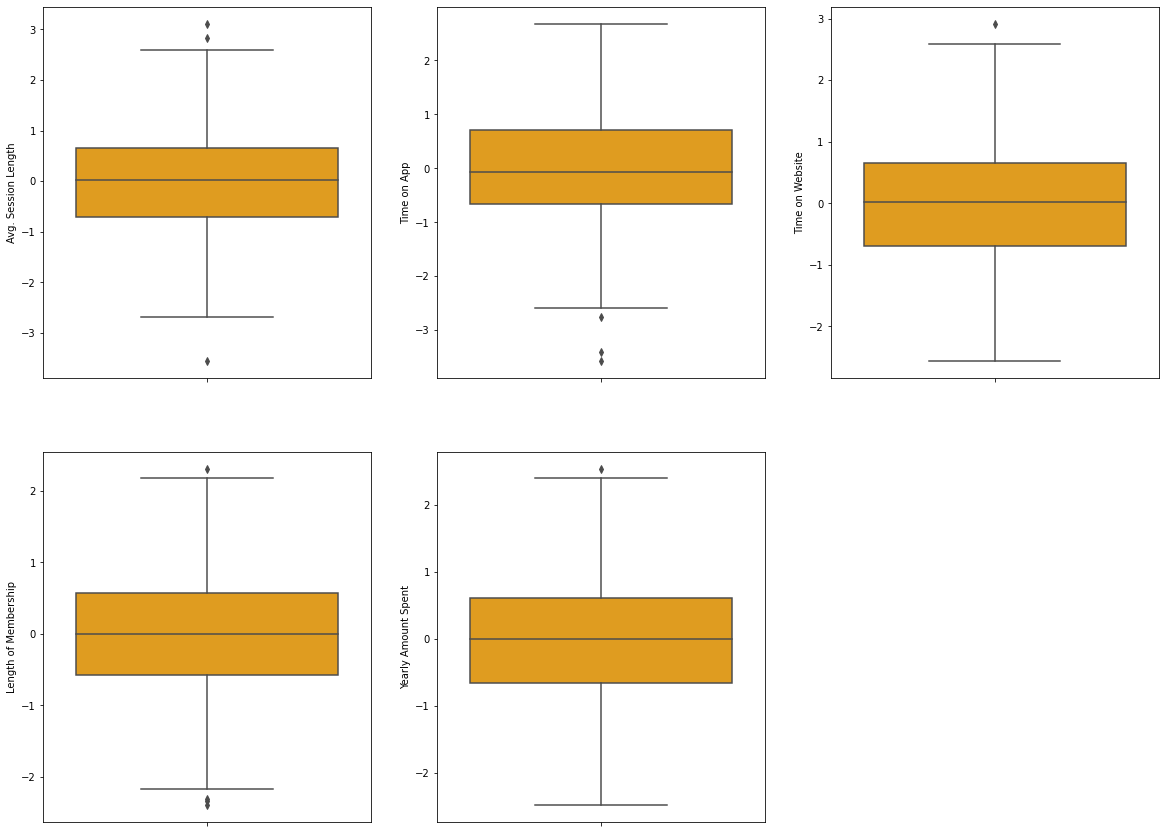

In [ ]:
fig, axes = plt.subplots(2, 3,figsize=(20, 15))
sns.boxplot(y=dataset["Avg. Session Length"],color="orange", ax=axes[0,0])
sns.boxplot(y=dataset["Time on App"],color="orange", ax=axes[0,1])
sns.boxplot(y=dataset["Time on Website"],color="orange", ax=axes[0,2])
sns.boxplot(y=dataset["Length of Membership"],color="orange", ax=axes[1,0])
sns.boxplot(y=dataset["Yearly Amount Spent"],color="orange", ax=axes[1,1])
fig.delaxes(axes.flatten()[5])

In [ ]:
ind = outliers_detector(df.iloc[:,3:],list(df.columns)[3:])
print(ind,len(df))
dataset = outliers_remover(dataset,ind)
print(len(dataset))

mini,-2.2994495056629765,maxi,2.3031467149778626,Q1,-0.5734759229226617,medain,0.0016296784587306991,Q3,0.577173132237548,irq,1.1506490551602098,Length of Membership
mini,-2.5554932958196943,maxi,2.516313154106033,Q1,-0.6535658770975464,medain,-0.0021945462524064043,Q3,0.6143857353838853,irq,1.2679516124814318,Yearly Amount Spent
[214, 320, 420, 487, 24] 483
478


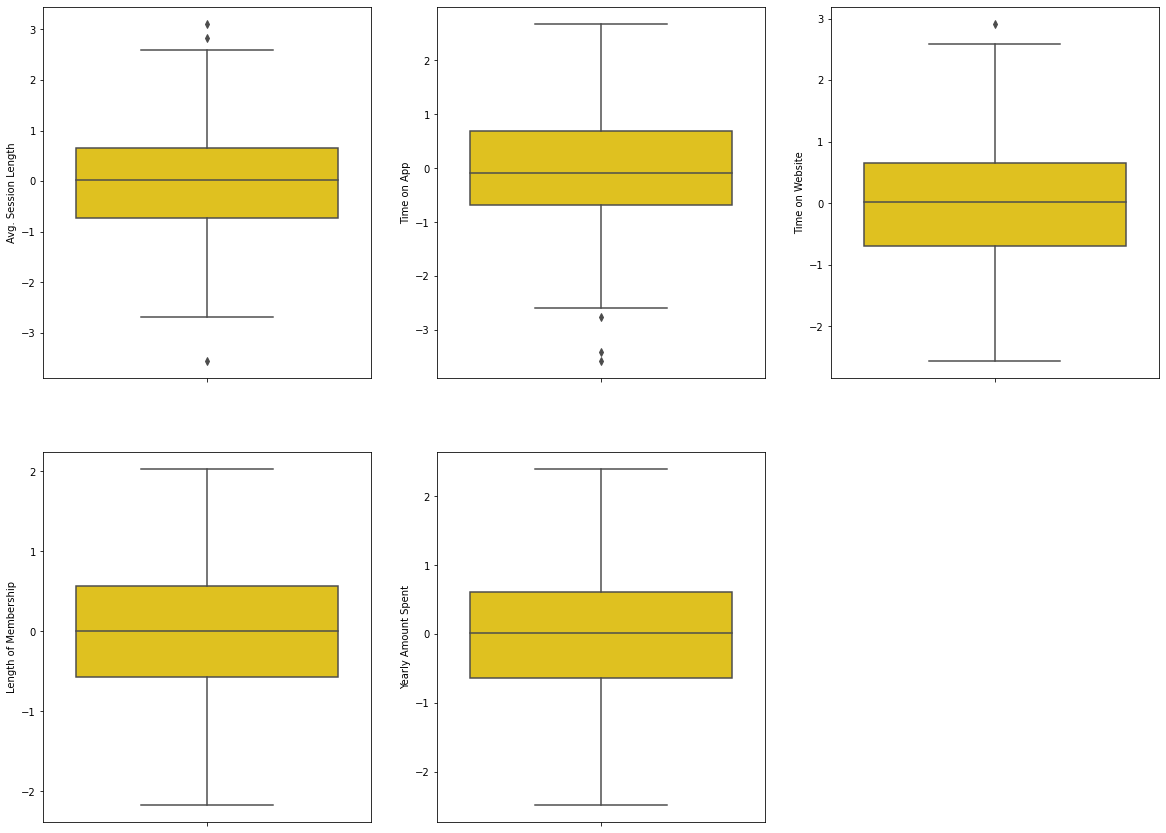

In [ ]:
fig, axes = plt.subplots(2, 3,figsize=(20, 15))
sns.boxplot(y=dataset["Avg. Session Length"],color="gold", ax=axes[0,0])
sns.boxplot(y=dataset["Time on App"],color="gold", ax=axes[0,1])
sns.boxplot(y=dataset["Time on Website"],color="gold", ax=axes[0,2])
sns.boxplot(y=dataset["Length of Membership"],color="gold", ax=axes[1,0])
sns.boxplot(y=dataset["Yearly Amount Spent"],color="gold", ax=axes[1,1])
fig.delaxes(axes.flatten()[5])

still we had outliers so  call the above functions once again

now we are free from the that outliers

#**checking correlation of datset**

---



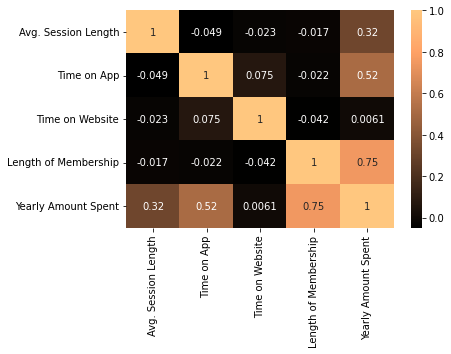

In [ ]:
sns.heatmap(dataset.corr(),annot=True,cmap="copper")

# **function for dist plot**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

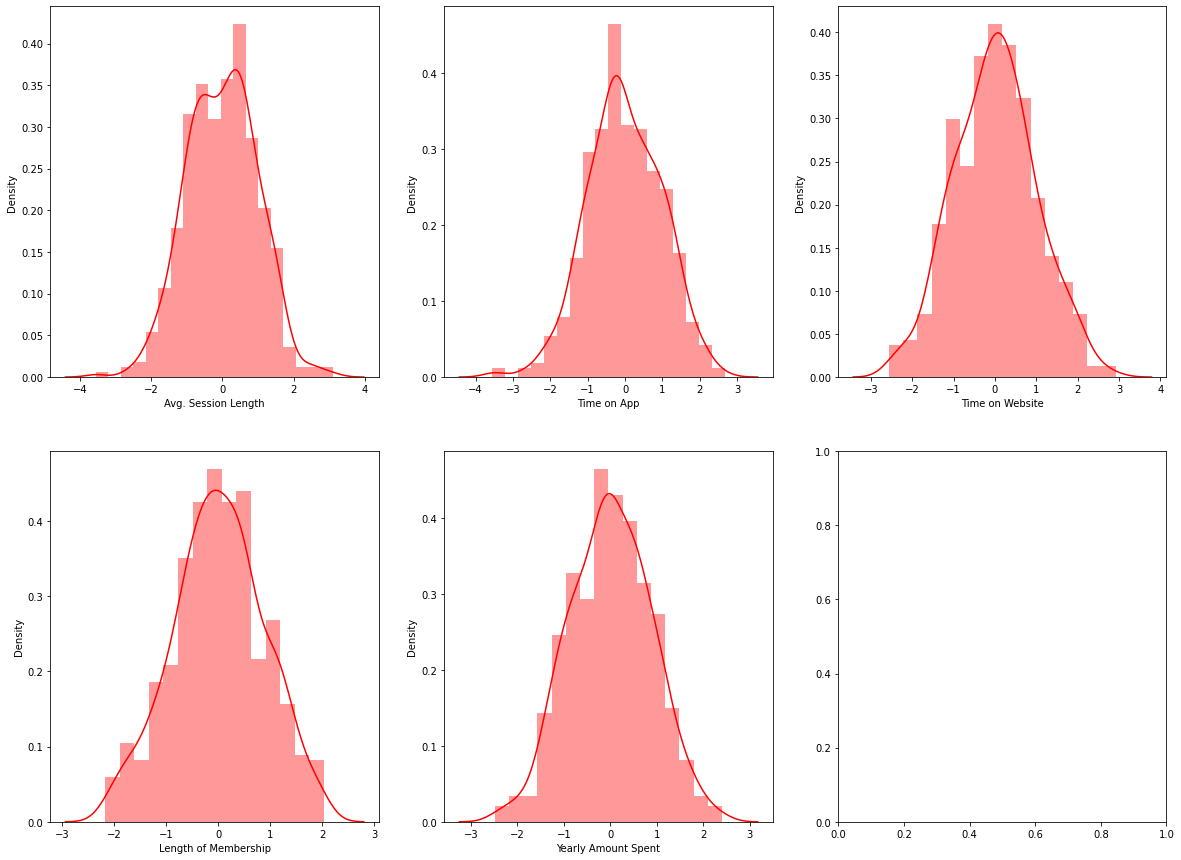

In [ ]:
fig, axes = plt.subplots(2, 3,figsize=(20, 15))
sns.distplot(dataset["Avg. Session Length"],color="red", ax=axes[0,0])
sns.distplot(dataset["Time on App"],color="red", ax=axes[0,1])
sns.distplot(dataset["Time on Website"],color="red", ax=axes[0,2])
sns.distplot(dataset["Length of Membership"],color="red", ax=axes[1,0])
sns.distplot(dataset["Yearly Amount Spent"],color="red", ax=axes[1,1])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


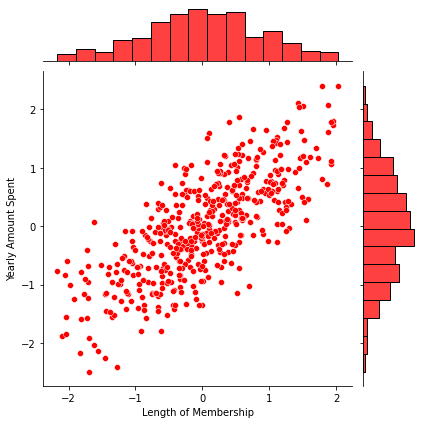

In [ ]:
for i in df.columns[3:-1]:
  sns.jointplot(df[i],df.iloc[:,-1],color="red")

In [ ]:
dataset["more_or_less"] = dataset["Yearly Amount Spent"].apply(lambda x: "greater" if x>500 else("lesser"))

**make a pair plot to get more details regrading the dataset**

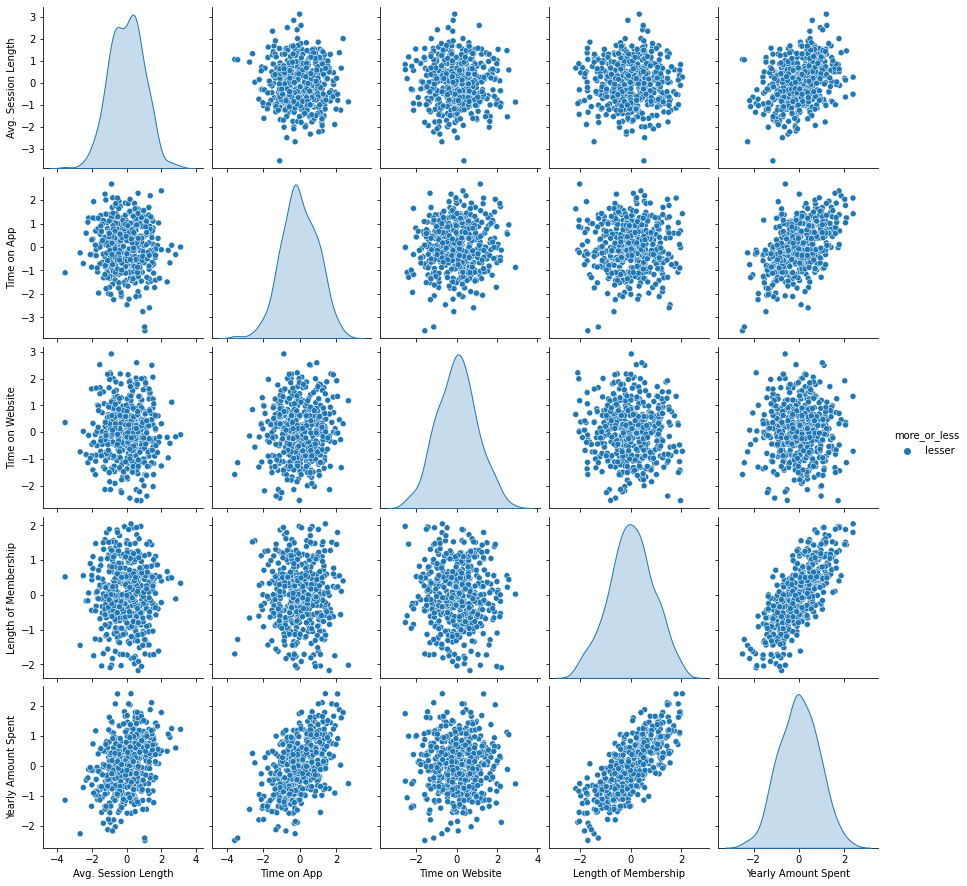

In [ ]:
sns.pairplot(dataset,hue="more_or_less")

In [ ]:
dataset.drop("more_or_less",axis=1,inplace=True)

# Started buliding model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import statsmodels.api as sm

**Decalaring independent and dependent features**

In [ ]:
x= dataset.iloc[:,3:-1]
y=dataset.iloc[:,-1]

**spliting tarining and testing data**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=42)

**Applying Linear regression model**

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

**Predecton test Values**

In [ ]:
pred = lr.predict(x_test)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


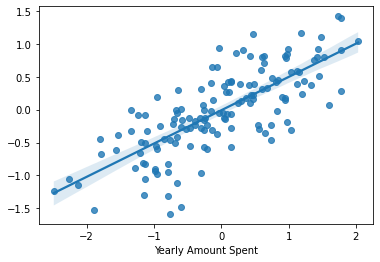

In [ ]:
sns.regplot(y_test,pred)

In [ ]:
mse = mean_squared_error(y_test,pred)
print(f" mean square error {mse}"," \n",f"squared mean square error {mse**0.5}")#,mean_square_error_mine(y_test,pred))
print(f" mean absolute error {mean_absolute_error(y_test,pred)}")

 mean square error 0.38468502004223  
 squared mean square error 0.6202298122810851
 mean absolute error 0.4976456061831985


In [ ]:
model = sm.OLS(y,x).fit()
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.566
Model:                             OLS   Adj. R-squared (uncentered):              0.565
Method:                  Least Squares   F-statistic:                              622.1
Date:                 Sat, 31 Dec 2022   Prob (F-statistic):                    1.68e-88
Time:                         08:16:48   Log-Likelihood:                         -415.06
No. Observations:                  478   AIC:                                      832.1
Df Residuals:                      477   BIC:                                      836.3
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [ ]:
"Traing Accuracy",lr.score(x_train,y_train)

('Traing Accuracy', 0.5649433692682488)

In [ ]:
"Testing Accuracy",lr.score(x_test,y_test)

('Testing Accuracy', 0.5653986635450485)

In [ ]:
pd.DataFrame(lr.coef_,index=x_train.columns)

,0
Length of Membership,0.725522
